Setting up training generator...
Found 5216 images belonging to 2 classes.
Setting up test/validation generator...
Found 624 images belonging to 2 classes.


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Calculated steps_per_epoch: 41
Calculated validation_steps: 5

Epoch 1/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 302s 7s/step - accuracy: 0.7379 - loss: 0.5763 - val_accuracy: 0.6282 - val_loss: 0.7128
Epoch 2/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.7627 - loss: 0.5062 - val_accuracy: 0.6859 - val_loss: 0.6451
Epoch 3/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.8169 - loss: 0.3881 - val_accuracy: 0.7756 - val_loss: 0.4833
Epoch 4/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8447 - loss: 0.3384 - val_accuracy: 0.8478 - val_loss: 0.3471
Epoch 5/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.8735 - loss: 0.2887 - val_accuracy: 0.8429 - val_loss: 0.3526


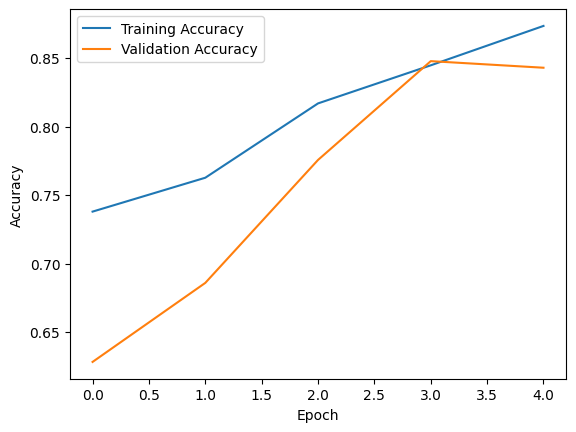

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


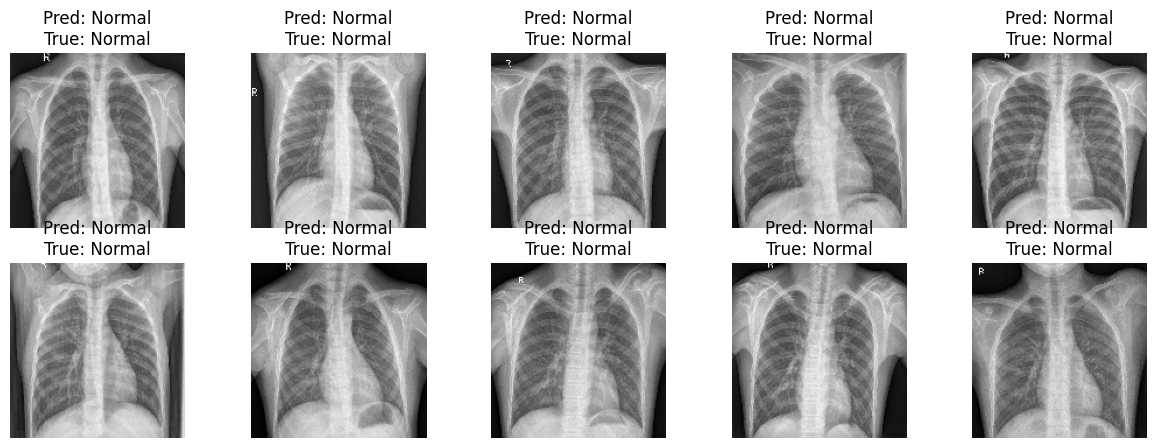

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math # Import math for ceil
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D
from PIL import Image
from sklearn.model_selection import train_test_split

# --- Directory Paths ---
train_dir = r"C:\Users\HP\Downloads\Xray\train"
test_dir = r"C:\Users\HP\Downloads\Xray\test"

# --- Data Augmentation/Preprocessing ---
train_datagen = ImageDataGenerator(
    rescale=1./255, # Corrected to use float division for clarity
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2
)
test_datagen = ImageDataGenerator(rescale=1./255)

# --- Generator Setup ---
BATCH_SIZE = 128
TARGET_SIZE = (150, 150)

print("Setting up training generator...")
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# ERROR FIX: Define test_gen
print("Setting up test/validation generator...")
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False # Typically set to False for validation/test data
)

# --- Model Definition (No changes needed) ---
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# --- Training (Fit) Setup ---
# ERROR FIX: Calculate steps as (total samples / batch size)
steps_per_epoch = math.ceil(train_gen.samples / BATCH_SIZE)
validation_steps = math.ceil(test_gen.samples / BATCH_SIZE)

print(f"\nCalculated steps_per_epoch: {steps_per_epoch}")
print(f"Calculated validation_steps: {validation_steps}\n")

history = model.fit(
    train_gen,
    epochs=5,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_gen,
    validation_steps=validation_steps
)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
predictions = model.predict(test_gen)
import matplotlib.pyplot as plt
import numpy as np

# Function to display predictions on 10 test samples
def display_10_sample_predictions(model, test_generator, class_names):
    # Reset the generator to start from the beginning
    test_generator.reset()
    
    # Get a batch of images and labels
    x_test, y_true = next(test_gen)
    y_pred = model.predict(x_test[:10])  # Predict on the first 10 samples
    y_pred_labels = (y_pred > 0.5).astype(int).reshape(-1)  # Convert to binary labels if needed

    # Plot the 10 samples with predictions
    plt.figure(figsize=(15, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i])
        true_label = class_names[int(y_true[i])]
        pred_label = class_names[y_pred_labels[i]]
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
        plt.axis('off')
    plt.show()

# Example usage
class_names = ['Normal', 'Pneumonia']  # Adjust based on your class labels
display_10_sample_predictions(model, test_gen, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


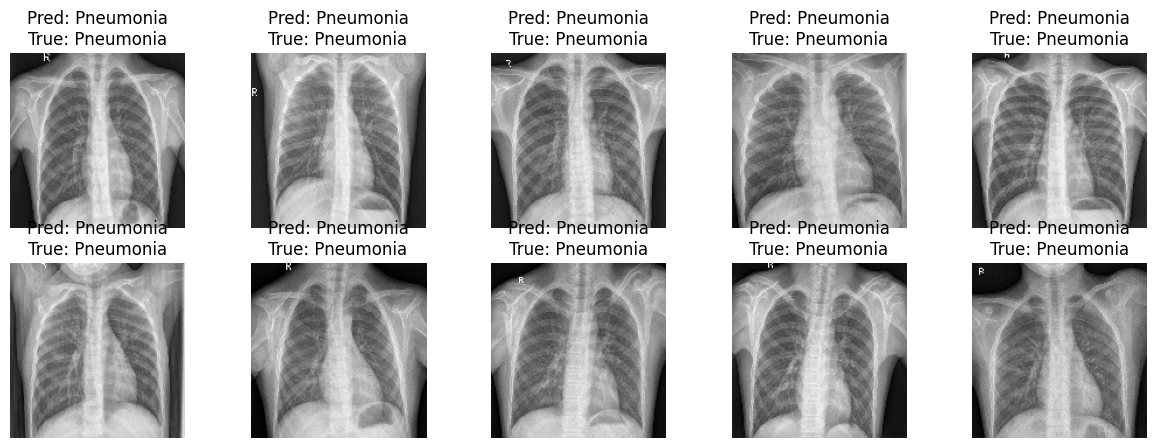

In [13]:
class_names = ['Pneumonia']  # Adjust based on your class labels
display_10_sample_predictions(model, test_gen, class_names)